# Assignment 8

### 1.复习课上内容， 阅读相应论文。

### 2. 回答以下理论题目

#### 1.  What is autoencoder?

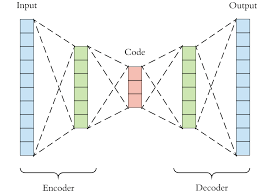

An Autoencoder is a type of artificial neural network used to learn efficient data codings (latent code) in an unsupervised manner, typically for dimensionality reduction.  
An autoencoder is constituted by two main parts: an encoder that maps the input into the latent code, and a decoder that maps the latent coder to a reconstruction of the orginal input.

#### 2. What are the differences between greedy search and beam search?

Greedy search makes the locally optimal choice at each stage.   
Beam search is a heuristic search algorithm that explores a graph by expanding the most promising node in a limited set. It only stores a predetermined number of best states at each level (called the beam width).  Beam search is not optimal (that is, there is no guarantee that it will find the best solution), since beam search sacrified completeness abd a goal state could potentially be pruned.

#### 3. What is the intuition of attention mechanism?

https://www.youtube.com/watch?v=SysgYptB198  

The problem of long sequences:   
For short sentences the model is hard to translate how to get all the words right and for lang sentences it is difficult to memorize a super long sentence.  Attention model translates a bit more like humans, because huamns look at part of a sentence at a time. With an attention model the performance can be stable instead of a huge decrease.  

Attention model intuition:  
Take a simple sentence for example. In the following figure there are two bi-directional RNNs. The bottom one computes some set of features for each of the input words and the upper one generates the English translation. The important thing is what part of French sentences (maybe in a few surrounding words) should be paid attention to. The attention model computes a set of attention weights.
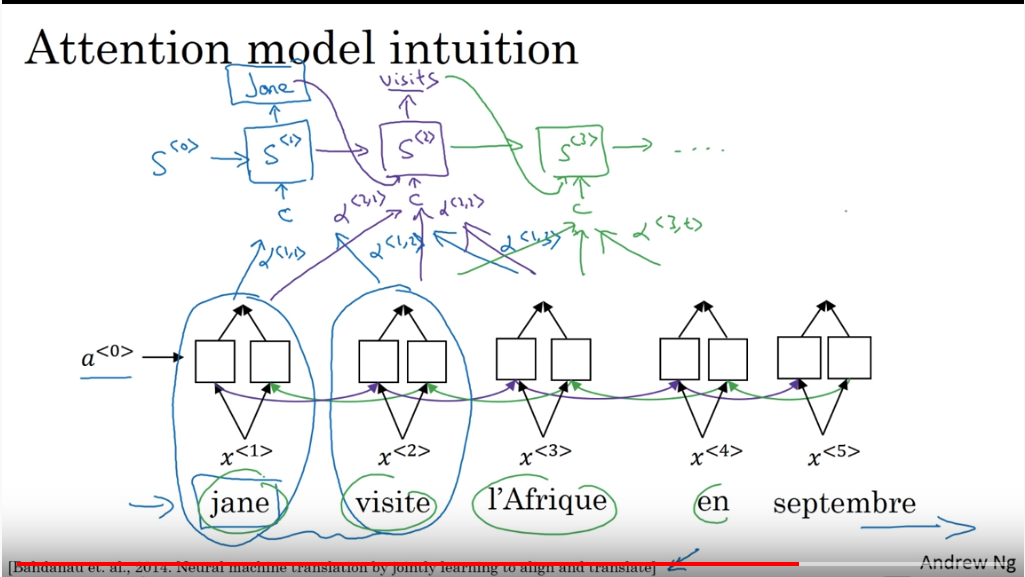

#### 4. What is the disadvantage of word embeding introduced in previous lectures ?

The word embedding in previous lecture can't solve polysemy, because each token is assigned only one representation (i.e. latent code).

#### 5. What is the architecture of ELMo model. (A brief description is enough)

ELMo (Embeddings from Language Models) is a deep contextualized word representation that models both (1) complex characteristics of word use (e.g., syntax and semantics), and (2) how these uses vary across linguistic contexts (i.e., to model polysemy). The representations in ELMo are derived from a bidirectional LSTM that is trained with a coupled language model objective on a large text corpus.  

$$ELMo_{k}^{task} = E(R_{k};\Theta^{task}) = \gamma^{task}\sum_{j=0}^{L} s_{j}^{task}h_{k,j}^{LM}$$  
$$s^{task} - softmax-normalized weights$$    
$$\gamma^{task} - the scalar prameter$$



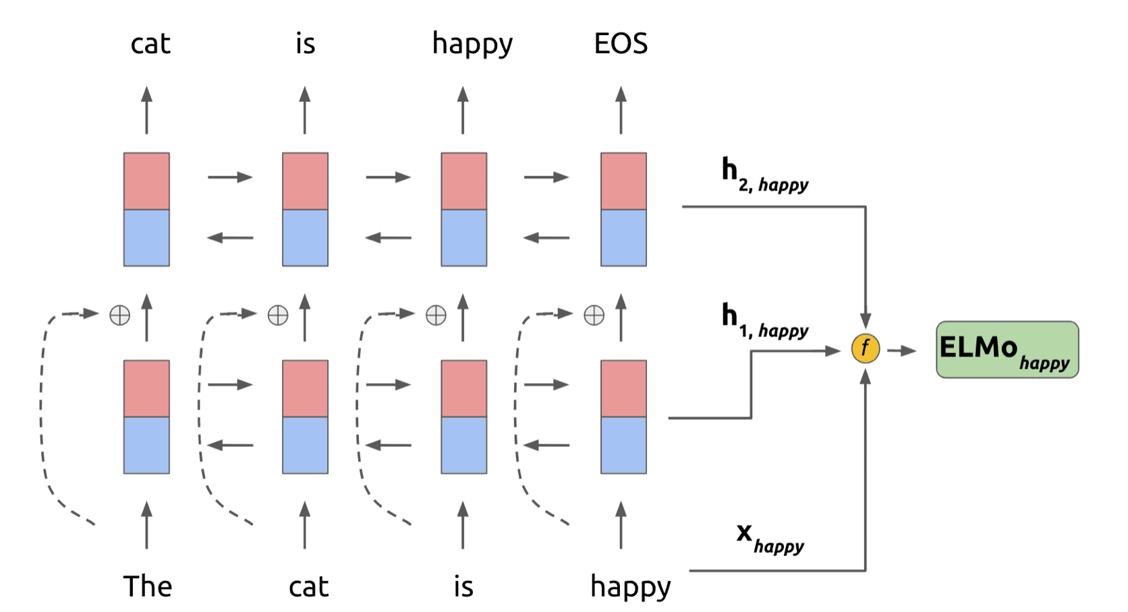  

#### 6. Compared to RNN,  what is the advantage of Transformer ?

Thanks to https://fatmatarlaci.wordpress.com/2019/03/11/transformers/  

RNNs don't support parallelization within instances. Their inherently sequential nature makes them unfit for increasing larger datasets. With the rencent success of the attention mechanism transformers can overcome the sequentiality peoblem that RNNs suffer from.

#### 7. Why we use layer normalizaiton instead of batch normalization in Transformer ?

Thanks to https://mlexplained.com/2018/01/13/weight-normalization-and-layer-normalization-explained-normalization-in-deep-learning-part-2/

In batch normalization, the statistics are computed across the batch, thus it is sensitive to the batch size. However, Layer normalization illustrates the independence between inputs, because the statistics are computed across each feature.

#### 8. Why we need position embedding in Transformer ?

Thanks to https://kazemnejad.com/blog/transformer_architecture_positional_encoding/

For a sentence the position and order of words are important. RNNs inherently take the order of words into account, but the transformer ditched the recurrence mechanism in favor of multi-head self attention mechanism. As each word in a sentence simutaneously flows through the Transformer's encoder/decoder stack, the model needs a way to incorporate the order of words. The position embedding is a simple technique to avoid the disorder of words.

#### 9. Briefly describe what is self-attention and what is multi-head attention?

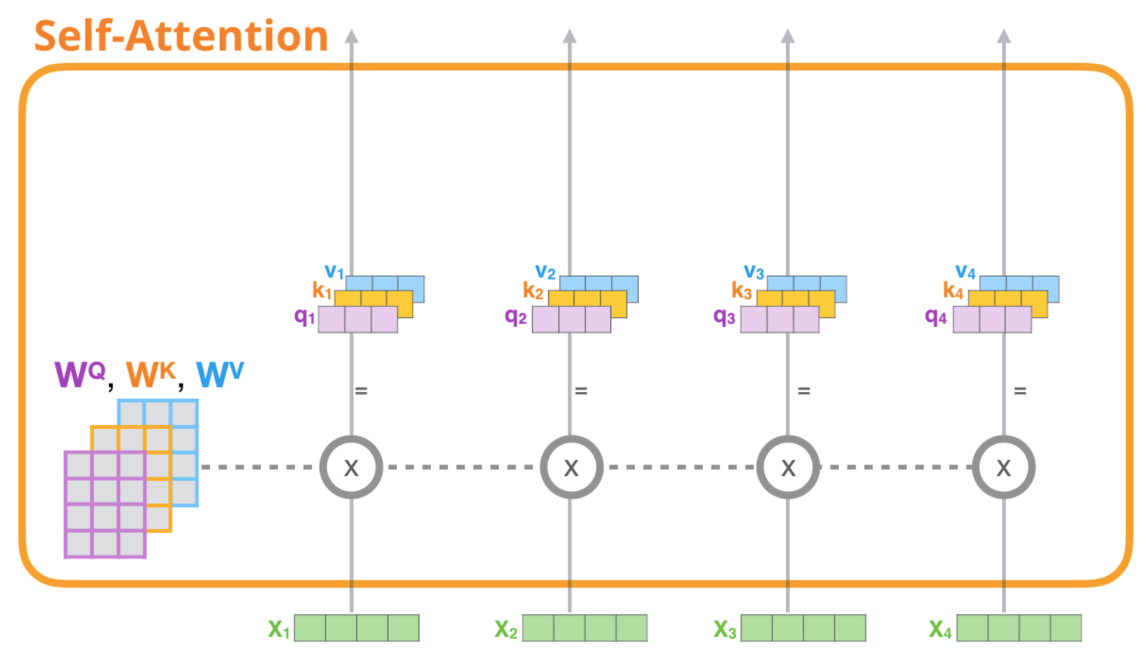  

**self-attention:**  
An attention function can be described as mapping a query and a set of key-value pairs to an output,where the query (Q), keys (K), values (V), and output are all vectors. The output is computed as a weighted sum of the values, where the weight assigned to each value is computed by a compatibility function of thequery with the corresponding key.  
$$Attention(Q,K,V) = softmax(\frac{QK^{T}}{\sqrt(d_{k})})V$$  

**multi-head attention:**  
we found it beneficial to linearly project the queries, keys and values h times with different, learned linear projections to dk, dk and dv dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding dv-dimensional output values.  
$$MultiHead(Q,K,V) = Concat(head_1,..., head_h) W^O$$  
where $head_{i} = Attention(QW_i^Q,KW_i^K,VW_i^V)$

#### 10. What is the basic unit of GPT model?

GPT model is an unidirectional transformer based on decoder， in which masked self-attention mechanism is used.

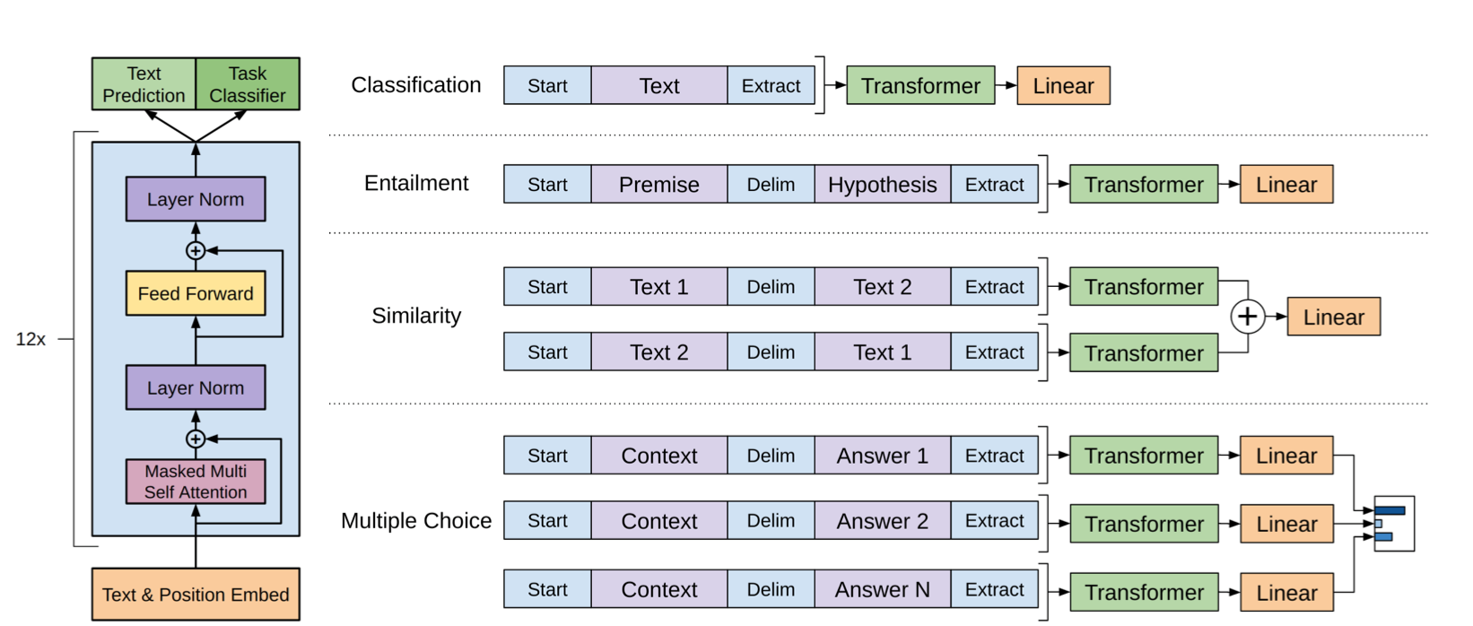  

#### 11. Briefly descibe how to use GPT in other NLP tasks?

如上图所示：
1. Classification(分类): 添加Linear层，将维度映射到分类的数目  
2. Entailment(文本蕴含):   
文本蕴含任务(text entailment)，它的任务形式是：给定一个前提文本(premise)，根据这个前提去推断假说文本(hypothesis)与前提文本的关系，一般分为蕴含关系（entailment）和矛盾关系(contradiction)，蕴含关系(entailment)表示从前提文本中可以推断出假说文本；矛盾关系(contradiction)即假说文本与前提文本矛盾。模型输入为(Premise,$,Hypothesis)，输出是文本蕴含的结果就是概率值。
3. Similarity(相似度):  
针对相似度的任务，对于两个句子的比较没有先后顺序，因此我们将输入改为两种不同顺序的组合，但对于每个顺序组合单独处理，因此我们会得到两个序列表示，将两者相加输入Linear层。
4. Multiple Choice(问答任务或推理任务): 给定context和一系列回答{a_k}，连接context和每一个回答，单独处理每一个拼接序列，经过Linear层和Softmax将产生一个可能回答的输出分布。

#### 12. What is masked language model in BERT ?

In order to train a deep bidirectional representation, we simply mask some percentage of the input tokens at random, and then predict those masked tokens. We refer to this procedure as a “masked LM” (MLM).  
If the i-th token is chosen, we replace the i-th token with (1) the [MASK] token 80% of the time (2) a random token 10% of the time (3) the unchanged i-th token 10% of the time.

#### 13. What are the inputs of BERT ?

The input embeddings are the sum of the token embeddings, the segmentation
embeddings and the position embeddings.

#### 14. Briely descibe how to use BERT in other NLP tasks.

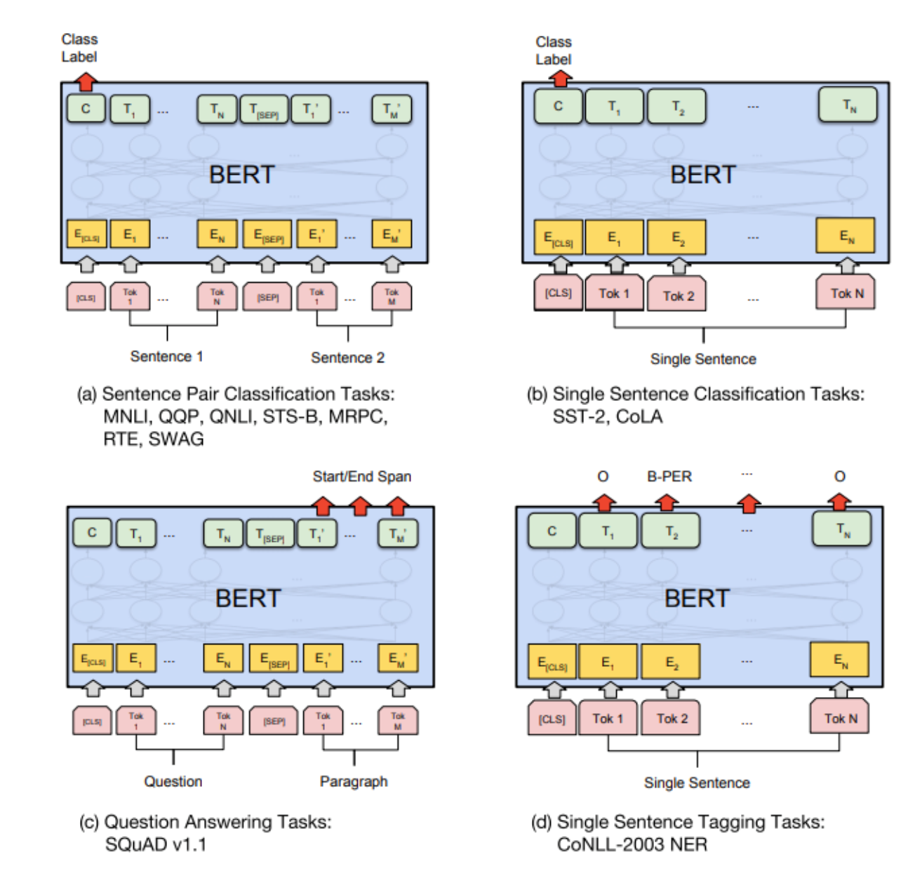  

(a)Sentence Pair Classification Tasks(推理): 取出最后一层的隐状态  
(b)Single Sentence Classification Tasks(比如情感分析): [CLS] -> Linear -> Classification  
(c)Question Answering Tasks(问答任务): 取出最后一层[SEP]后的隐状态  
(d)Single Sentence Tagging Tasks(标注任务): 

#### 15. What are the differences between these three models: GPT, BERT, GPT2.

BERT: bi-directional Transformer  
GPT: uni-directional Transformer  
GPT2: compared to GPT the model is deeper and bigger